In [1]:
import numpy as np
import sys
import scipy.io as sio  # For reading the matlab .mat format
from scipy.stats import zscore, entropy
from scipy.special import binom as binomial
import collections
import pickle as pk
import itertools
import persim
import numpy as np
import pandas as pd
import iisignature as iis
import gudhi
from gtda.homology import VietorisRipsPersistence
from gtda.homology import FlagserPersistence
import time
import matplotlib.pyplot as plt
import random
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Amplitude
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from scipy.stats import ttest_ind
%run FUNCTIONS.ipynb

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
def create_diagram_matrices(L,T,indifferent_value):
    f=create_filtration(L,T,indifferent_value)
    simpl_list=f[0]
    sc=gudhi.SimplexTree()
    for i in enumerate(simpl_list):
        index,simplices=i
        sc.insert(simplices[0], filtration=simplices[1])
        
    dgm=sc.persistence()
    return dgm

In [10]:
def create_diagram_directly(mv_time_series, indifferent_value):
    L=lead_matrix_1(time_series)
    T=lead_tensor_1(time_series)
    f=create_filtration(L,T,indifferent_value)
    simpl_list=f[0]
    sc=gudhi.SimplexTree()
    for i in enumerate(simpl_list):
        index,simplices=i
        sc.insert(simplices[0], filtration=simplices[1])
        
    dgm=sc.persistence()
    return dgm

In [15]:
# PATH SIGNATURE



Sig=list()
labels=[]




#rTLE Patients


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20100305/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20110427/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20111123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120626/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20121210/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20130821/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20150605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20170920/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20180126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20190123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("rTLE")









# lTLE Patients
data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20101001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20110715/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120828/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120918/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130205/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130215/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130827/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20140605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20171201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20180706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("lTLE")







# CONTROL GROUP
for i in range(1,9):
    if ((not i==4) and (not i==7)):
        data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
        time_series=data.transpose()[100:,:]
        s=iis.prepare(160,2)
        feat=iis.logsig(time_series,s)
        Sig.append(feat)
        labels.append("Control")
for i in range(12,15):
    data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
    time_series=data.transpose()[100:,:]
    s=iis.prepare(160,2)
    feat=iis.logsig(time_series,s)
    Sig.append(feat)
    labels.append("Control")
    
    
    

    

    
    
data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20130802-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131018-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131025-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20140506-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190319-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190522-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190710-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190720-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190723-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[100:,:]
s=iis.prepare(160,2)
feat=iis.logsig(time_series,s)
Sig.append(feat)
labels.append("Control")


Sig_array=np.array(Sig)

In [16]:
X_train, X_test, y_train, y_test=train_test_split(Sig_array,labels,test_size=0.2)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.4444444444444444


In [17]:
Sig_array.shape

(42, 12880)

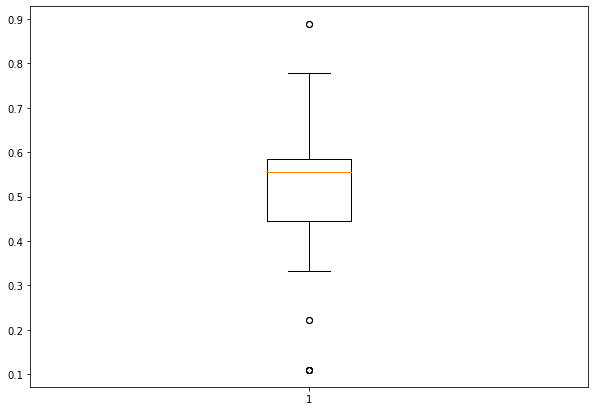

In [18]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(Sig_array,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

In [ ]:
# cross validation
sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=10
cv=KFold(n_fold,shuffle=False)
score_1=cross_val_score(ppl,Sig_array,labels,cv=cv,n_jobs=-1)
print(score_1)

In [20]:
# LEAD MATRIX

Lead_list=list()
labels=[]




#rTLE Patients


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20100305/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")



data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20110427/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20111123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120626/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20121210/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20130821/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20150605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20170920/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20180126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20190123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("rTLE")









# lTLE Patients
data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20101001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20110715/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120828/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120918/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130205/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130215/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130827/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20140605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20171201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20180706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("lTLE")







# CONTROL GROUP
for i in range(1,9):
    if ((not i==4) and (not i==7)):
        data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
        time_series=data.transpose()[50:,:]
        L=lead_matrix_1(time_series)
        N=L.shape[0]
        feat=[]
        for j in range(N):
            for k in range(j,N):
                if (not j==k):
                    feat.append(L[j,k])
        Lead_list.append(feat)
        labels.append("Control")
        
        
for i in range(12,15):
    data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
    time_series=data.transpose()[50:,:]
    L=lead_matrix_1(time_series)
    N=L.shape[0]
    feat=[]
    for j in range(N):
        for k in range(j,N):
            if (not j==k):
                feat.append(L[j,k])
    Lead_list.append(feat)
    labels.append("Control")
    
    
    

    

    
    
data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20130802-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131018-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131025-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20140506-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190319-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190522-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190710-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190720-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190723-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[50:,:]
L=lead_matrix_1(time_series)
N=L.shape[0]
feat=[]
for j in range(N):
    for k in range(j,N):
        if (not j==k):
            feat.append(L[j,k])
Lead_list.append(feat)
labels.append("Control")


Lead_array=np.array(Lead_list)

In [21]:
X_train, X_test, y_train, y_test=train_test_split(Lead_array,labels,test_size=0.2)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.5555555555555556


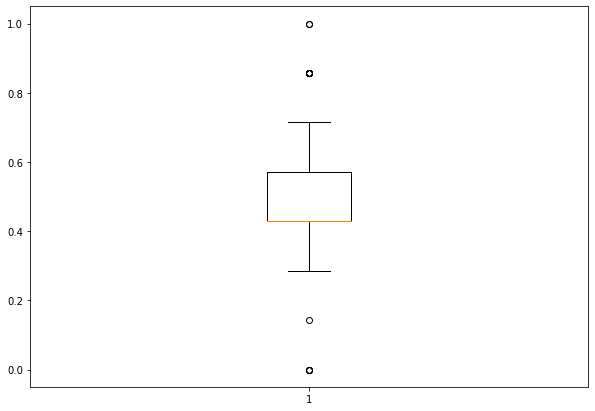

In [26]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(Lead_array,labels,test_size=0.15)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [29]:
# cross validation
sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=15
cv=KFold(n_fold,shuffle=False)
score_1=cross_val_score(ppl,Lead_array,labels,cv=cv,n_jobs=-1)
print(score_1)

[0.33333333 0.         0.         0.         0.         0.
 0.33333333 0.         1.         1.         1.         1.
 1.         1.         1.        ]


In [11]:
# COMPLEX DIRECTED

topological_clique_list=list()
labels=[]




#rTLE Patients


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20100305/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")



data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20110427/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20111123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120626/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20121210/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20130821/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20150605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20170920/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20180126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20190123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("rTLE")









# lTLE Patients
data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20101001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20110715/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120828/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120918/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130205/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130215/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130827/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20140605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20171201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20180706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("lTLE")







# CONTROL GROUP
for i in range(1,9):
    if ((not i==4) and (not i==7)):
        data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
        time_series=data.transpose()
        L=lead_matrix_1(time_series)
        dgm_clique=rev_directed(L)
        PE = PersistenceEntropy()
        pe_feat = PE.fit_transform(dgm_clique)
        A=Amplitude()
        ampl_feat=A.fit_transform(dgm_clique)
        feat1=pe_feat.flatten()
        feat2=ampl_feat.flatten()
        feat=np.concatenate((feat1,feat2), axis=0)
        topological_clique_list.append(feat)
        labels.append("Control")
        
        
for i in range(12,15):
    data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
    time_series=data.transpose()
    L=lead_matrix_1(time_series)
    dgm_clique=rev_directed(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    topological_clique_list.append(feat)
    labels.append("Control")
    
    
    

    

    
    
data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20130802-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131018-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131025-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20140506-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190319-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190522-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190710-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190720-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190723-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_directed(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_clique_list.append(feat)
labels.append("Control")

topological_clique_array=np.array(topological_clique_list)

In [12]:
X_train, X_test, y_train, y_test=train_test_split(topological_clique_array,labels,test_size=0.2)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.5555555555555556


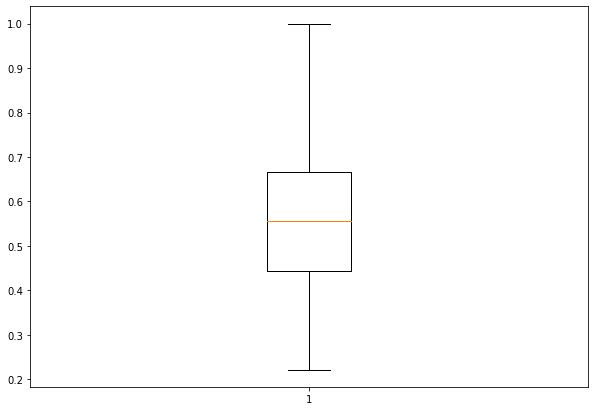

In [13]:
#PLOT OF RANDOM FOREST ACCURACY PATH SIGNATURE
acc_values=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(topological_clique_array,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [30]:
# cross validation
sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=10
cv=KFold(n_fold,shuffle=True)
score_1=cross_val_score(ppl,topological_clique_array,labels,cv=cv,n_jobs=-1)
print(score_1)

[0.2  0.6  1.   0.25 0.25 0.25 0.   1.   0.5  0.5 ]


In [32]:
# COMPLEX UNDIRECTED

topological_undirected_clique_list=list()
labels=[]




#rTLE Patients


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20100305/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")



data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20110427/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20111123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120626/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20121210/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20130821/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20150605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20170920/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20180126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20190123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("rTLE")









# lTLE Patients
data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20101001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20110715/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120828/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120918/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130205/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130215/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130827/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20140605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20171201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")

data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20180706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("lTLE")







# CONTROL GROUP
for i in range(1,9):
    if ((not i==4) and (not i==7)):
        data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
        time_series=data.transpose()
        L=lead_matrix_1(time_series)
        dgm_clique=rev_undirected(L)
        PE = PersistenceEntropy()
        pe_feat = PE.fit_transform(dgm_clique)
        A=Amplitude()
        ampl_feat=A.fit_transform(dgm_clique)
        feat1=pe_feat.flatten()
        feat2=ampl_feat.flatten()
        feat=np.concatenate((feat1,feat2), axis=0)
        topological_undirected_clique_list.append(feat)
        labels.append("Control")
        
        
for i in range(12,15):
    data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
    time_series=data.transpose()
    L=lead_matrix_1(time_series)
    dgm_clique=rev_undirected(L)
    PE = PersistenceEntropy()
    pe_feat = PE.fit_transform(dgm_clique)
    A=Amplitude()
    ampl_feat=A.fit_transform(dgm_clique)
    feat1=pe_feat.flatten()
    feat2=ampl_feat.flatten()
    feat=np.concatenate((feat1,feat2), axis=0)
    topological_undirected_clique_list.append(feat)
    labels.append("Control")
    
    
    

    

    
    
data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20130802-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131018-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131025-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20140506-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190319-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190522-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190710-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190720-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190723-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
dgm_clique=rev_undirected(L)
PE = PersistenceEntropy()
pe_feat = PE.fit_transform(dgm_clique)
A=Amplitude()
ampl_feat=A.fit_transform(dgm_clique)
feat1=pe_feat.flatten()
feat2=ampl_feat.flatten()
feat=np.concatenate((feat1,feat2), axis=0)
topological_undirected_clique_list.append(feat)
labels.append("Control")

topological_undirected_clique_array=np.array(topological_undirected_clique_list)

In [59]:
X_train, X_test, y_train, y_test=train_test_split(topological_undirected_clique_array,labels,test_size=0.25)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.45454545454545453


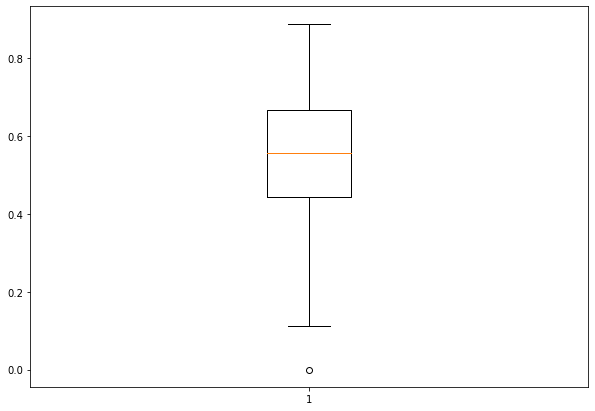

In [60]:
#PLOT OF RANDOM FOREST ACCURACY PATH SIGNATURE
acc_values=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(topological_undirected_clique_array,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [62]:
# cross validation
sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=10
cv=KFold(n_fold,shuffle=False)
score_1=cross_val_score(ppl,topological_clique_array,labels,cv=cv,n_jobs=-1)
print(score_1)

[0.   0.   0.75 0.   0.   0.5  1.   1.   0.75 0.25]


In [11]:
# HYPERCOHERENCE
indifferent_value=0.05
Hyp_coh_list=list()
labels=[]
labels_simple=[]
gender=[]
name=[]
time_points=[]

#rTLE Patients


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20100305/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20100305")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20110427/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20110427")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20111123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20111123")
time_points.append(time_series.shape[0])

data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120626/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20120626")
time_points.append(time_series.shape[0])

data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120706")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20121210/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20121210")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20130821/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130821")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20150605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20150605")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20170920/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20170920")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20180126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20180126")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20190123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20190123")
time_points.append(time_series.shape[0])







# lTLE Patients
data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20101001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20101001")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20110715/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20110715")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120201")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120828/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20120828")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120918/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120918")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20121001")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20121126")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130205/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130205")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130215/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130215")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130827/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20130827")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20140605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20140605")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20171201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20171201")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20180706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20180706")
time_points.append(time_series.shape[0])







# CONTROL GROUP
for i in range(1,9):
    if ((not i==4) and (not i==7)):
        data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
        time_series=data.transpose()
        L=lead_matrix_1(time_series)
        T=lead_tensor_1(time_series)
        f=create_filtration(L,T,indifferent_value)
        hyp=f[2]
        Hyp_coh_list.append(hyp)
        labels.append("Control")
        name.append(f"sub-{i}")
        labels_simple.append("Control")
        if i==6:
            gender.append("F")
        else:
            gender.append("M")
        time_points.append(time_series.shape[0])
        
        
for i in [12,13,14,18,19,21]:
    data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
    time_series=data.transpose()
    L=lead_matrix_1(time_series)
    T=lead_tensor_1(time_series)
    f=create_filtration(L,T,indifferent_value)
    hyp=f[2]
    Hyp_coh_list.append(hyp)
    labels.append("Control")
    name.append(f"sub-{i}")
    labels_simple.append("Control")
    if i in [12,19,21]:
        gender.append("M")
    else:
        gender.append("F")
    time_points.append(time_series.shape[0])
    
    
    
    

    

    
    
data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20130802-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20130802")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131018-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20131018")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131025-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
gender.append("F")
labels_simple.append("Control")
name.append("sub-ctr20131025")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20140506-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("F")
name.append("sub-ctr20140506")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190319-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190319")
time_points.append(time_series.shape[0])



data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190522-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190522")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190710-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("F")
name.append("sub-ctr20190710")
time_points.append(time_series.shape[0])

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190720-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190720")
time_points.append(time_series.shape[0])

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190723-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190723")
time_points.append(time_series.shape[0])

Hyp_coh_array=np.array(Hyp_coh_list)

In [12]:
age=[28,24,32,37,39,52,30,22,60,27,36,36,18,40,32,51,44,27,26,43,26,42,30,29,30,47,42,26,37,31,37,30,34,24,36,28,34,31,26,30,25,32,25,31,25]

In [13]:
HYP=Hyp_coh_array.reshape(-1,1)

In [14]:
X_train, X_test, y_train, y_test=train_test_split(HYP,labels,test_size=0.25)
clf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.5


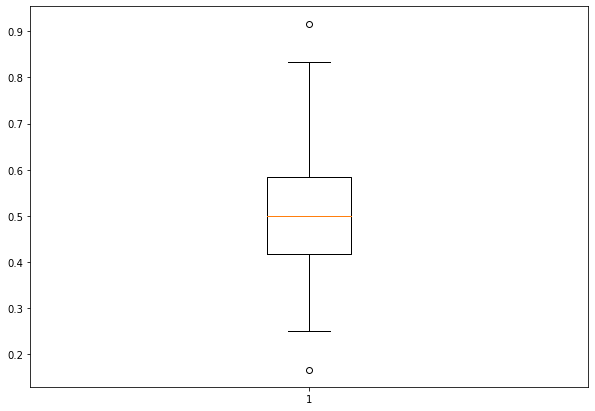

In [15]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(HYP,labels,test_size=0.25)
    clf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [16]:
# cross validation
sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=7
cv=KFold(n_fold,shuffle=False)
score_1=cross_val_score(ppl,HYP,labels,cv=cv,n_jobs=-1)
print(score_1)

[0.         0.14285714 0.         0.5        1.         0.66666667
 0.66666667]


In [17]:
data={'Name': name, 'Hypercoherence': Hyp_coh_list,"Gender": gender,"Age":age,"Type": labels_simple, "Time points": time_points}

In [18]:
df=pd.DataFrame(data)

In [19]:
df

,Name,Hypercoherence,Gender,Age,Type,Time points
0,sub-epi20100305,0.867978,F,28,TLE,600
1,sub-epi20110427,0.924918,M,24,TLE,600
2,sub-epi20111123,0.851230,F,32,TLE,600
3,sub-epi20120626,0.953897,M,37,TLE,600
4,sub-epi20120706,0.888545,F,39,TLE,600
5,sub-epi20121210,0.865384,F,52,TLE,600
6,sub-epi20130821,0.898374,F,30,TLE,600
7,sub-epi20150605,0.900693,F,22,TLE,600
8,sub-epi20170920,0.869153,F,60,TLE,600
9,sub-epi20180126,0.836460,M,27,TLE,600


In [20]:
df.to_csv("Table_Epilepsy.csv")

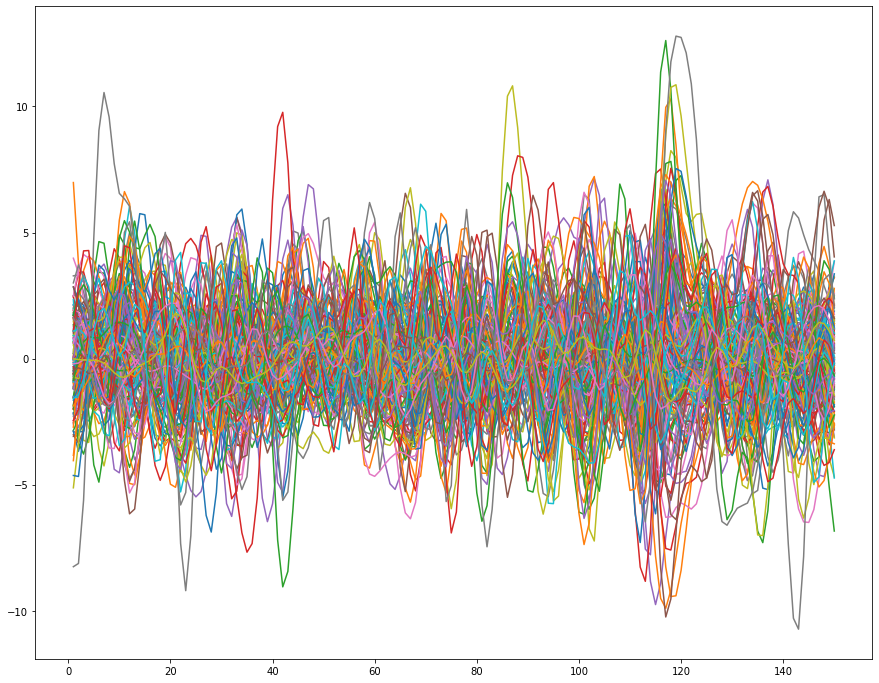

0.7840279436350609


In [21]:
data=load_data_mat("Data/destrieux_timecourse/controls/sub-ctr20190723-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[150:300,:]
l=time_series.shape[0]
N=time_series.shape[1]
plt.figure(figsize=(15,12))
t=range(1,l+1)
for i in range(N):
    plt.plot(t,time_series[:,i])
plt.show()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
print(hyp)
    

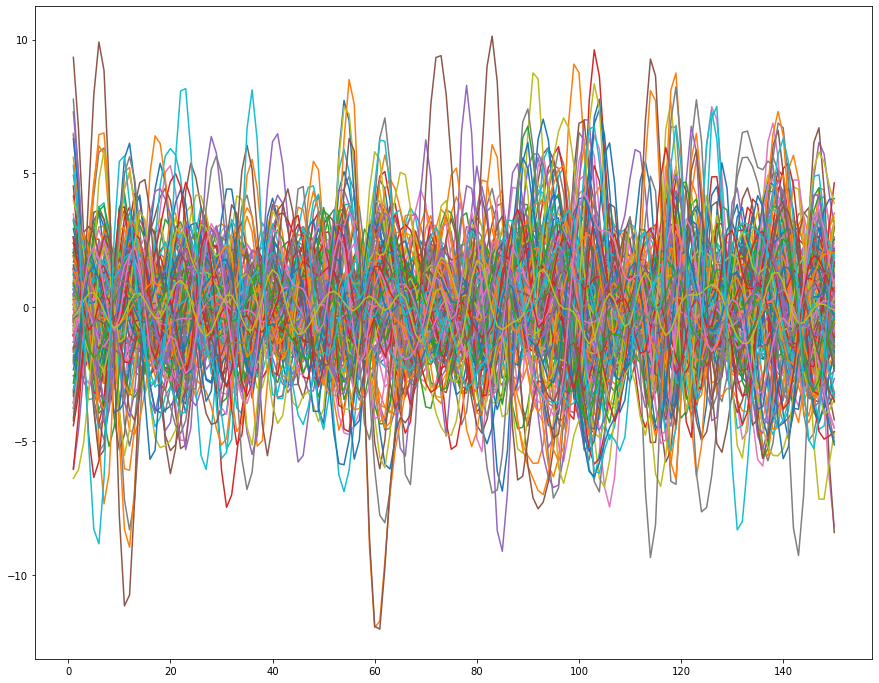

In [22]:
data=load_data_mat("Data/destrieux_timecourse/controls/sub-ctr20130802-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
l=time_series.shape[0]
N=time_series.shape[1]
plt.figure(figsize=(15,12))
t=range(1,l+1)
for i in range(N):
    plt.plot(t,time_series[:,i])
plt.show()

In [26]:
# HYPERCOHERENCE 2
indifferent_value=0.07
Hyp_coh_list=list()
labels=[]
labels_simple=[]
gender=[]
name=[]
time_points=[]

#rTLE Patients


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20100305/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20100305")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20110427/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20110427")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20111123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20111123")
time_points.append(time_series.shape[0])

data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120626/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20120626")
time_points.append(time_series.shape[0])

data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120706")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20121210/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20121210")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20130821/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130821")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20150605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20150605")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20170920/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20170920")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20180126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20180126")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20190123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20190123")
time_points.append(time_series.shape[0])







# lTLE Patients
data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20101001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20101001")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20110715/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20110715")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120201")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120828/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20120828")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120918/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120918")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20121001")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20121126")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130205/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130205")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130215/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130215")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130827/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20130827")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20140605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20140605")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20171201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20171201")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20180706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20180706")
time_points.append(time_series.shape[0])







# CONTROL GROUP
for i in range(1,9):
    if ((not i==4) and (not i==7)):
        data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
        time_series=data.transpose()
        L=lead_matrix_1(time_series)
        T=lead_tensor_1(time_series)
        f=create_filtration(L,T,indifferent_value)
        hyp=f[2]
        Hyp_coh_list.append(hyp)
        labels.append("Control")
        name.append(f"sub-{i}")
        labels_simple.append("Control")
        if i==6:
            gender.append("F")
        else:
            gender.append("M")
        time_points.append(time_series.shape[0])

data=load_data_mat("Data/destrieux_timecourse/controls/sub-12/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("control")
labels_simple.append("control")
gender.append("M")
name.append("sub-12")
time_points.append(time_series.shape[0])
        
    
        
        
for i in [13,14,18,19,21]:
    data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
    time_series=data.transpose()
    L=lead_matrix_1(time_series)
    T=lead_tensor_1(time_series)
    f=create_filtration(L,T,indifferent_value)
    hyp=f[2]
    Hyp_coh_list.append(hyp)
    labels.append("Control")
    name.append(f"sub-{i}")
    labels_simple.append("Control")
    if i in [19,21]:
        gender.append("M")
    else:
        gender.append("F")
    time_points.append(time_series.shape[0])
    
    
    
    

    

    
    
data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20130802-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20130802")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131018-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20131018")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131025-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
gender.append("F")
labels_simple.append("Control")
name.append("sub-ctr20131025")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20140506-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("F")
name.append("sub-ctr20140506")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190319-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190319")
time_points.append(time_series.shape[0])



data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190522-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190522")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190710-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("F")
name.append("sub-ctr20190710")
time_points.append(time_series.shape[0])

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190720-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190720")
time_points.append(time_series.shape[0])

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190723-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190723")
time_points.append(time_series.shape[0])

Hyp_coh_array=np.array(Hyp_coh_list)

In [27]:
data2={'Name': name, 'Hypercoherence': Hyp_coh_list,"Gender": gender,"Age":age,"Type": labels_simple, "Time points": time_points}
df2=pd.DataFrame(data2)
df2.to_csv("Table_Epilepsy_TIMEPOINTS150_first150.csv")

In [28]:
df2

,Name,Hypercoherence,Gender,Age,Type,Time points
0,sub-epi20100305,0.851833,F,28,TLE,150
1,sub-epi20110427,0.917241,M,24,TLE,150
2,sub-epi20111123,0.808476,F,32,TLE,150
3,sub-epi20120626,0.869911,M,37,TLE,150
4,sub-epi20120706,0.857008,F,39,TLE,150
5,sub-epi20121210,0.802699,F,52,TLE,150
6,sub-epi20130821,0.870368,F,30,TLE,150
7,sub-epi20150605,0.863909,F,22,TLE,150
8,sub-epi20170920,0.847162,F,60,TLE,150
9,sub-epi20180126,0.817630,M,27,TLE,150


In [42]:
etl=np.array(df2.iloc[:,[1,2]])


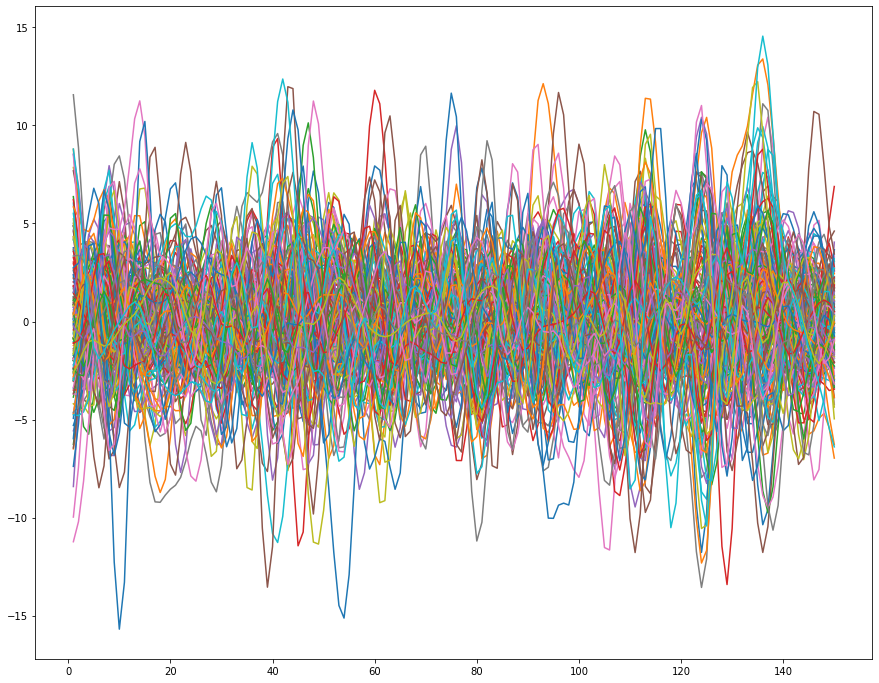

In [79]:
data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,:]
l=time_series.shape[0]
N=time_series.shape[1]
plt.figure(figsize=(15,12))
t=range(1,l+1)
for i in range(N):
    plt.plot(t,time_series[:,i])
plt.show()

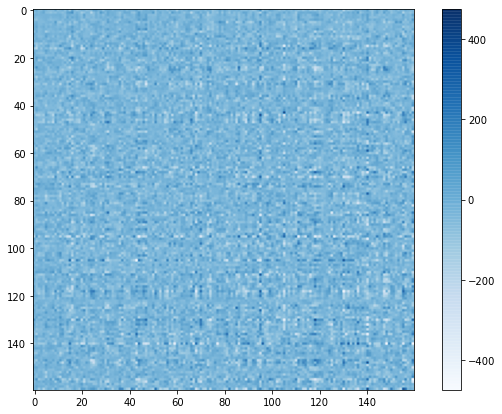

In [80]:
L=lead_matrix_1(time_series)
plt.figure(figsize=(10,7))
plt.imshow(L, alpha=0.9, cmap="Blues")
plt.colorbar()

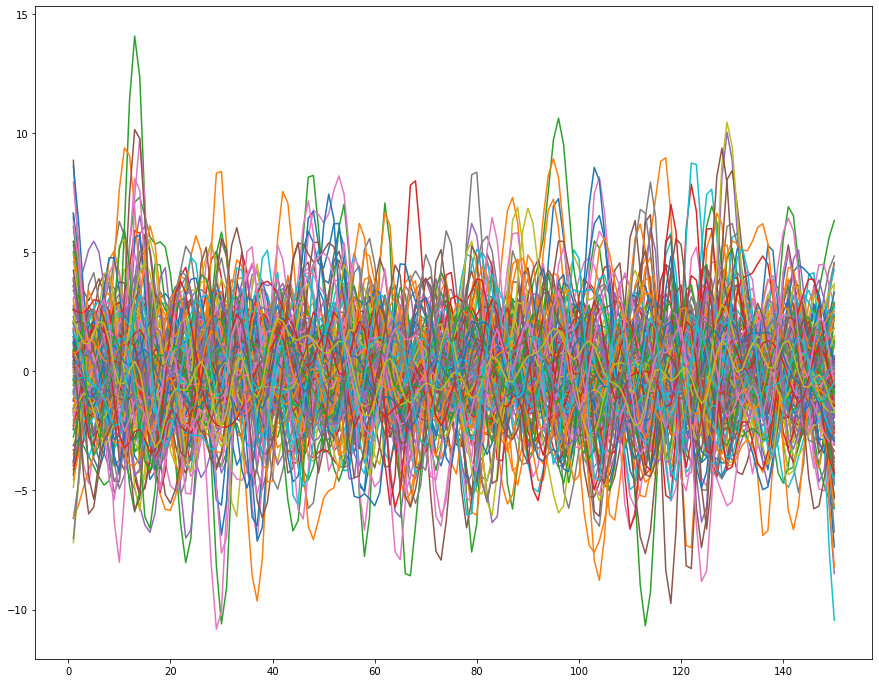

In [83]:
data=load_data_mat("Data/destrieux_timecourse/controls/sub-1/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()
l=time_series.shape[0]
N=time_series.shape[1]
plt.figure(figsize=(15,12))
t=range(1,l+1)
for i in range(N):
    plt.plot(t,time_series[:,i])
plt.show()

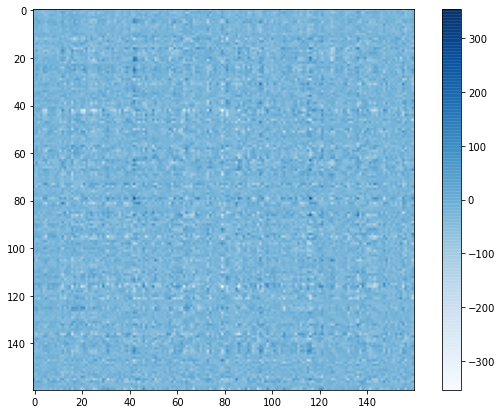

In [84]:
L=lead_matrix_1(time_series)
plt.figure(figsize=(10,7))
plt.imshow(L, alpha=0.9, cmap="Blues")
plt.colorbar()

In [31]:
# HYPERCOHERENCE 2
indifferent_value=0.07
Hyp_coh_list=list()
labels=[]
labels_simple=[]
gender=[]
name=[]
time_points=[]

#rTLE Patients


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20100305/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20100305")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20110427/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20110427")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20111123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20111123")
time_points.append(time_series.shape[0])

data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120626/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20120626")
time_points.append(time_series.shape[0])

data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20120706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120706")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20121210/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20121210")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20130821/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130821")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20150605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20150605")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20170920/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20170920")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20180126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20180126")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/rTLE/sub-epi20190123/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("rTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20190123")
time_points.append(time_series.shape[0])







# lTLE Patients
data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20101001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20101001")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20110715/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20110715")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120201")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120828/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20120828")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20120918/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20120918")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121001/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20121001")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20121126/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20121126")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130205/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130205")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130215/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20130215")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20130827/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20130827")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20140605/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20140605")
time_points.append(time_series.shape[0])



data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20171201/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("M")
name.append("sub-epi20171201")
time_points.append(time_series.shape[0])


data=load_data_mat("Data/destrieux_timecourse/lTLE/sub-epi20180706/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("lTLE")
labels_simple.append("TLE")
gender.append("F")
name.append("sub-epi20180706")
time_points.append(time_series.shape[0])







# CONTROL GROUP
for i in range(1,9):
    if ((not i==4) and (not i==7)):
        data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
        time_series=data.transpose()[:,::2]
        L=lead_matrix_1(time_series)
        T=lead_tensor_1(time_series)
        f=create_filtration(L,T,indifferent_value)
        hyp=f[2]
        Hyp_coh_list.append(hyp)
        labels.append("Control")
        name.append(f"sub-{i}")
        labels_simple.append("Control")
        if i==6:
            gender.append("F")
        else:
            gender.append("M")
        time_points.append(time_series.shape[0])

data=load_data_mat("Data/destrieux_timecourse/controls/sub-12/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("control")
labels_simple.append("control")
gender.append("M")
name.append("sub-12")
time_points.append(time_series.shape[0])
        
    
        
        
for i in [13,14,18,19,21]:
    data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-{i}/timeseries_regr_wgm_globmean_filt0009008.mat")
    time_series=data.transpose()[:,::2]
    L=lead_matrix_1(time_series)
    T=lead_tensor_1(time_series)
    f=create_filtration(L,T,indifferent_value)
    hyp=f[2]
    Hyp_coh_list.append(hyp)
    labels.append("Control")
    name.append(f"sub-{i}")
    labels_simple.append("Control")
    if i in [19,21]:
        gender.append("M")
    else:
        gender.append("F")
    time_points.append(time_series.shape[0])
    
    
    
    

    

    
    
data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20130802-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[:,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20130802")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131018-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[:,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20131018")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20131025-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[:,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
gender.append("F")
labels_simple.append("Control")
name.append("sub-ctr20131025")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20140506-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[:,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("F")
name.append("sub-ctr20140506")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190319-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190319")
time_points.append(time_series.shape[0])



data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190522-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190522")
time_points.append(time_series.shape[0])


data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190710-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("F")
name.append("sub-ctr20190710")
time_points.append(time_series.shape[0])

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190720-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190720")
time_points.append(time_series.shape[0])

data=load_data_mat(f"Data/destrieux_timecourse/controls/sub-ctr20190723-EEGfMRI/timeseries_regr_wgm_globmean_filt0009008.mat")
time_series=data.transpose()[0:150,::2]
L=lead_matrix_1(time_series)
T=lead_tensor_1(time_series)
f=create_filtration(L,T,indifferent_value)
hyp=f[2]
Hyp_coh_list.append(hyp)
labels.append("Control")
labels_simple.append("Control")
gender.append("M")
name.append("sub-ctr20190723")
time_points.append(time_series.shape[0])

Hyp_coh_array=np.array(Hyp_coh_list)

In [32]:
data3={'Name': name, 'Hypercoherence': Hyp_coh_list,"Gender": gender,"Age":age,"Type": labels_simple, "Time points": time_points}
df3=pd.DataFrame(data3)
df3.to_csv("Table_Epilepsy_80_nodes.csv")

In [33]:
df3

,Name,Hypercoherence,Gender,Age,Type,Time points
0,sub-epi20100305,0.857680,F,28,TLE,150
1,sub-epi20110427,0.917247,M,24,TLE,150
2,sub-epi20111123,0.805465,F,32,TLE,150
3,sub-epi20120626,0.877739,M,37,TLE,150
4,sub-epi20120706,0.853700,F,39,TLE,150
5,sub-epi20121210,0.773174,F,52,TLE,150
6,sub-epi20130821,0.877288,F,30,TLE,150
7,sub-epi20150605,0.843427,F,22,TLE,150
8,sub-epi20170920,0.858021,F,60,TLE,150
9,sub-epi20180126,0.836660,M,27,TLE,150


In [36]:
etl=

In [37]:
a

[0.8576801363193768,
 0.917246835443038,
 0.8054649464459591,
 0.877738558909445,
 0.8537000973709834,
 0.77317429406037,
 0.8772882181110029,
 0.843427458617332,
 0.8580209347614411,
 0.8366601752677703,
 0.9000486854917235,
 0.8708495618305745,
 0.8944985394352483,
 0.7907619279454723,
 0.853006329113924,
 0.8803310613437195,
 0.8710077896786758,
 0.8760223953261927,
 0.8396665043816942,
 0.8922103213242454,
 0.9010832521908472,
 0.8344814995131451,
 0.8561343719571568,
 0.881304771178189]